<a href="https://colab.research.google.com/github/kstatimiznakomi/soft-dev-tech/blob/master/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis, EDA

In [1]:
# ваш код
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore");

RAND = 10

- item_id : item id wich can be used later to merge with other IKEA dataframes
- name: the commercial name of items
- category: the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
- Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
- old_price: the price of item in Saudi Riyals before discount
- Short_description: a brief description of the item
- full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
- designer: The name of the designer who designed the item. this is extracted from the full_description column.
- size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item, the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
- width: Width of the item in Centimeter
- height: Height of the item in Centimeter
- depth: Depth of the item in Centimeter
- sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
- other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
- link: the web link of the item


**Какие типы задач можно решать с данным датасетом:**

- Регрессия: Прогнозирование продажной цены новых товаров
- Классификация: Предсказать категорию новых товаров
- Классификация: Предсказать, будет ли товар со скидкой

1) Прочитать файл IKEA_SA_Furniture_Web_Scrapings.csv и записать в переменную df

In [2]:
# ваш код
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings.csv')

2) Вывести первые пять строк

In [3]:
# ваш код
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


Внимательно изучите данные и попробуйте их осознать без применения пока графиков и стат параметров. Прочитайте подробнее, что значит каждое поле

3) Выведите размер датасета

In [4]:
# ваш код
df.shape

(3694, 13)

4) Вывести общую информацию о датафрейме при помощи метода info()

In [5]:
# ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 350.0+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [6]:
# ваш код
df.isna().sum()


,0
item_id,0
name,0
category,0
price,0
old_price,0
sellable_online,0
link,0
other_colors,0
short_description,0
designer,0


In [7]:
print(
    f'Доля пропусков depth: {round(df.depth.isna().sum() / df.shape[0]*100, 2)}%'
)
print(
    f'Доля пропусков height: {round(df.height.isna().sum() / df.shape[0]*100, 2)}%'
)
print(
    f'Доля пропусков width: {round(df.width.isna().sum() / df.shape[0]*100, 2)}%'
)

Доля пропусков depth: 39.6%
Доля пропусков height: 26.75%
Доля пропусков width: 15.94%


6) Вывести основные описательные статистики для числовых признаков

In [8]:
# ваш код
df.iloc[:, 1:].describe()

,price,depth,height,width
count,3694.000000,2231.000000,2706.000000,3105.000000
mean,1078.208419,54.379202,101.679970,104.470853
std,1374.652494,29.958351,61.097585,71.133771
min,3.000000,1.000000,1.000000,1.000000
25%,180.900000,38.000000,67.000000,60.000000
50%,544.700000,47.000000,83.000000,80.000000
75%,1429.500000,60.000000,124.000000,140.000000
max,9585.000000,257.000000,700.000000,420.000000


7) Вывести основные описательные статистики для булевых и категориальных признаков

In [9]:
# ваш код
df.describe(include=["object", "bool"])

,name,category,old_price,sellable_online,link,other_colors,short_description,designer
count,3694,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2,2962,2,1706,381
top,BESTÅ,Tables & desks,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden
freq,173,612,3040,3666,4,2182,59,828


8) Проанализировать признак old_price, посмотреть на **уникальные значения** (понадобится в следующем задании)

In [10]:
# ваш код
df['old_price'].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

9) **Написать функцию** (пока без применения) получения цены в формате float из признака **old_price** (преобразование значений признака в этой же колонке).

Пояснение:

- Если имеем значение = 'No old price' в old_price, то оставляем исходную цену, то есть берем значение из признака **price**
- Там, где присутствует значение **pack** в old_price, нужно просто убрать все то, что идет после знака /
- Например, цена SR 5,640 в old_price читается как SR 5640 (то есть без запятой), по итогу должны получить новое значение 5640
- На вход должны подаваться значения старой и новой цены

In [11]:
# data_old - значение из old_price
# data_price - значение из price
# return transform old_price

def change_old_price(data_old: str, data_price: float) -> float:
    # ваш код
    if data_old == 'No old price':
        return data_price
    if 'pack' in data_old:
        data_old = data_old.split('/')[0]
    data_old_cleaned = data_old.replace('SR', '').replace(',', '').strip()

    return float(data_old_cleaned)

10) Генерация и преобразование признаков
- Создать признак **flg_old_price**, где 0 - это означает, что есть значение **'No old price'** в признаке **old_price**, иначе поставить 1 (флаг)
- Преобразовать признак **old_price** при помощи написанной функции **change_old_price()** в задании 9
- Создать признак **discount_amount = старая цена - цена**

**Подсказка для преобразования old_price**:

```python
... = df.apply(lambda x: change_old_price(x['old_price'], x['price']), axis=1)
```

In [12]:
# ваш код
df['flg_old_price'] = df['old_price'].apply(lambda x: 0 if x == 'No old price' else 1)
df['old_price'] = df.apply(lambda x: change_old_price(x['old_price'], x['price']), axis=1)
df['discount_amount'] = df['old_price'] - df['price']


<div class="alert alert-block alert-success">
    
Представим, что мы будем решать задачу регрессии и на новых товарах предсказывать **новую** цену.

С учетом этого выдвините свои гипотезы далее
</div>

## 1 Гипотеза

- Старые и новые цены отличаются друг от друга, новые цены выше

Построить график распределения старой и текущих цен (уместить на одном графике), есть ли видимые отличия?

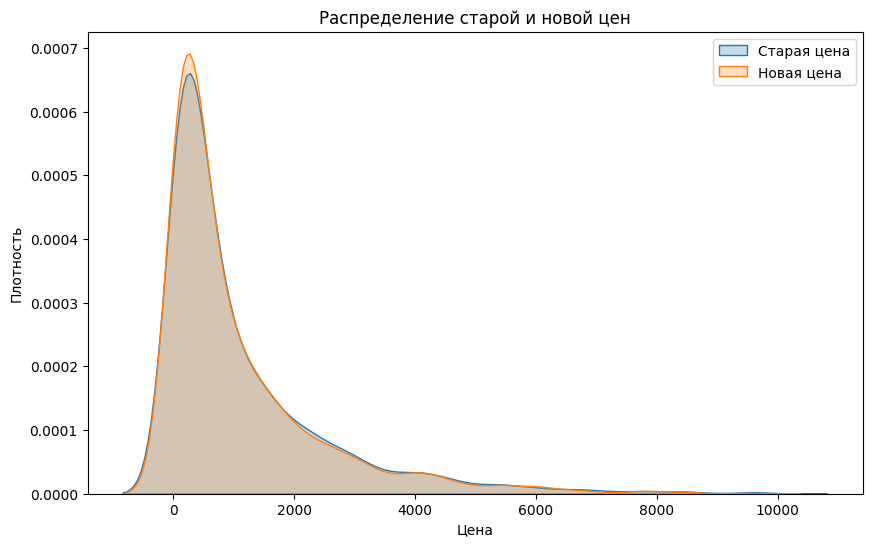

In [14]:
# ваш код
# Построение графика распределения цен
plt.figure(figsize=(10, 6))
sns.kdeplot(df['old_price'], label='Старая цена', fill=True)
sns.kdeplot(df['price'], label='Новая цена', fill=True)

# Настройка графика
plt.title('Распределение старой и новой цен')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.legend()
plt.show()

**Сделайте выводы**

- Глобальных отличий между распределениями старых и новых цен нет, новые цены где-то выше, а где-то нет
- Гипотеза не подтвердилась полностью

## 2 Гипотеза

- Текущие цены онлайн и оффлайн не отличаются в разрезе наличия скидки (можно использовать признак flg_old_price)

Сравнить при помощи boxplot и displot текущую цену при разных значениях sellable_online, есть ли разница?

Для графика boxplot также проанализировать различия в разрезе flg_old_price (параметр hue)

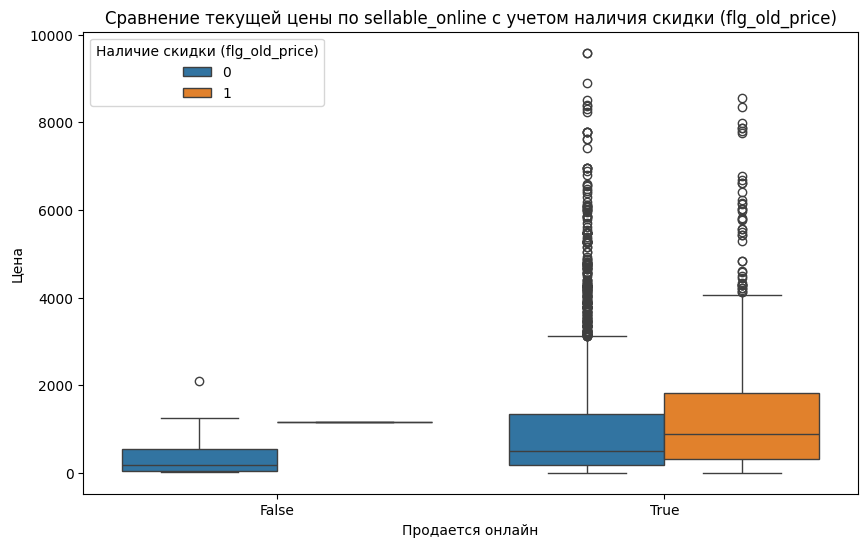

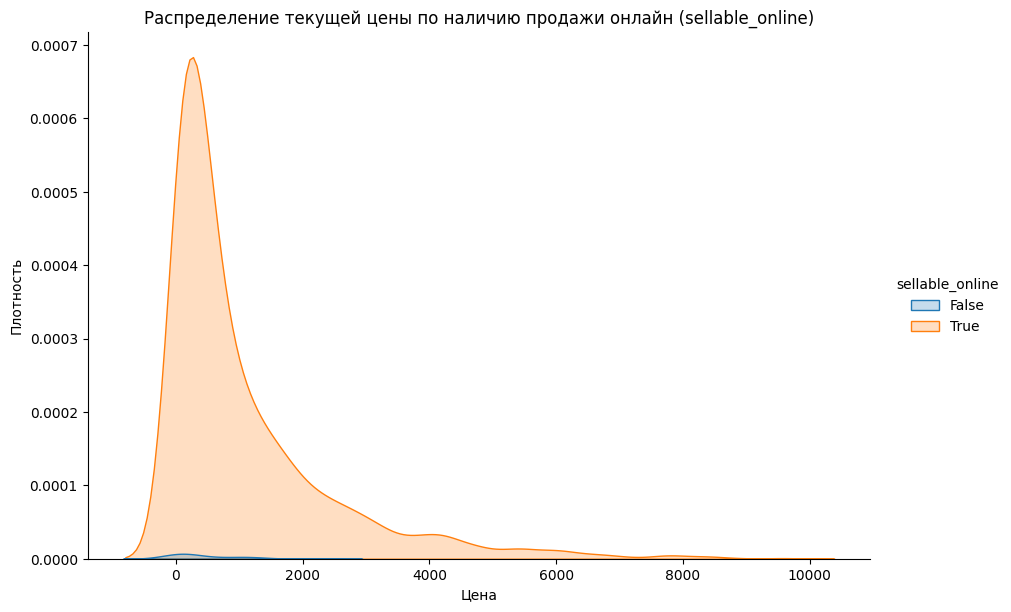

In [15]:
# ваш код
plt.figure(figsize=(10, 6))
sns.boxplot(x='sellable_online', y='price', hue='flg_old_price', data=df)
plt.title('Сравнение текущей цены по sellable_online с учетом наличия скидки (flg_old_price)')
plt.xlabel('Продается онлайн')
plt.ylabel('Цена')
plt.legend(title='Наличие скидки (flg_old_price)')
plt.show()
sns.displot(data=df, x='price', hue='sellable_online', kind='kde', height=6, aspect=1.5, fill=True)
plt.title('Распределение текущей цены по наличию продажи онлайн (sellable_online)')
plt.xlabel('Цена')
plt.ylabel('Плотность')
plt.show()

**Сделайте выводы**

- Наличие скидки влияет на распределение цен, но эти различия не зависят от того, продается товар онлайн или оффлайн.
- Гипотеза не подтвердилась.

## 3 Гипотеза

- Цены на товары, которые имеют несколько цветов, больше (многообразие цветов связано со значением цены)

Сравнить при помощи boxplot и displot цену при разных значениях other_colors, есть ли разница?

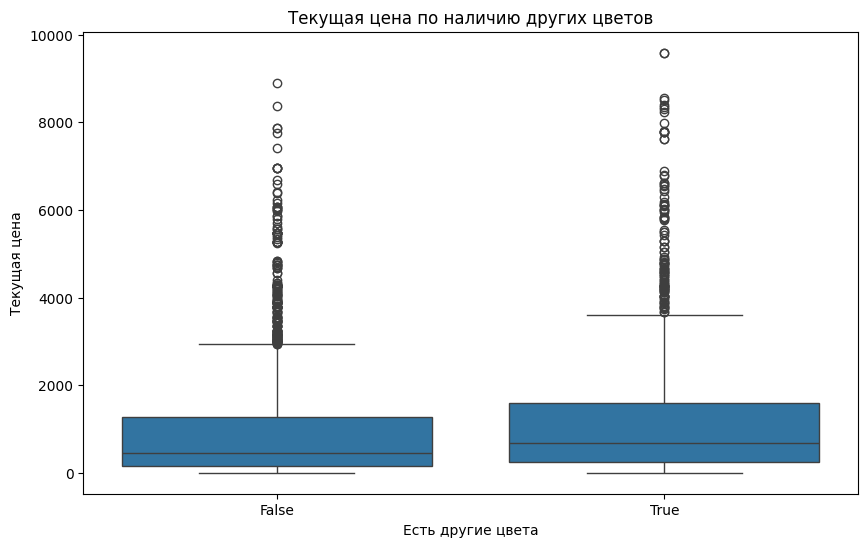

<Figure size 1000x600 with 0 Axes>

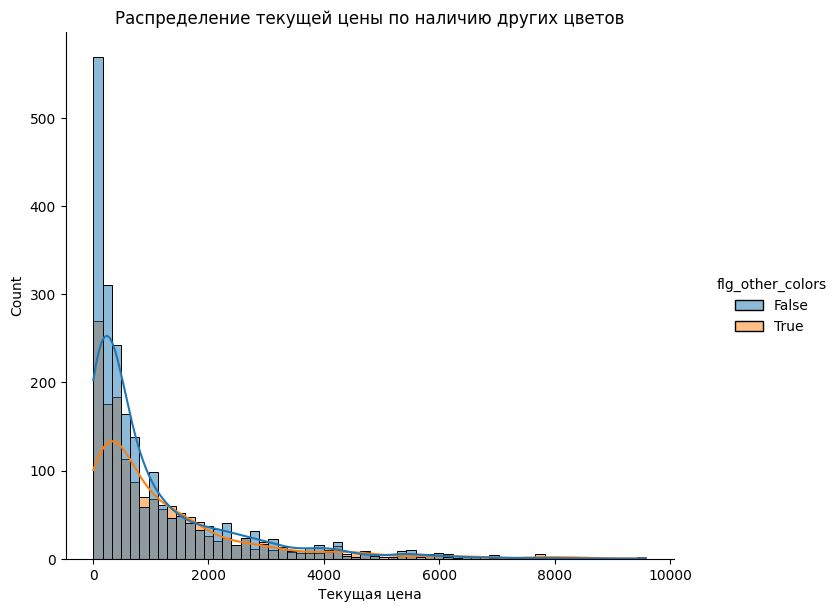

In [16]:
# ваш код
df['other_colors'].unique()
df['flg_other_colors'] = df['other_colors'].apply(lambda x: x != 'No')

plt.figure(figsize=(10, 6))
sns.boxplot(x='flg_other_colors', y='price', data=df)
plt.title('Текущая цена по наличию других цветов')
plt.ylabel('Текущая цена')
plt.xlabel('Есть другие цвета')
plt.show()

plt.figure(figsize=(10, 6))
sns.displot(df, x='price', hue='flg_other_colors', kde=True, height=6, aspect=1.2)
plt.title('Распределение текущей цены по наличию других цветов')
plt.xlabel('Текущая цена')
plt.show()

**Сделайте выводы**

- Товары с несколькими цветами имеют больший диапазон цен, явной и существенной разницы в медианных значениях между этими категориями не наблюдается.
- Гипотеза не подтвердилась.

## Ваши гипотезы

Необходимо написать как минимум еще 4 гипотезы, которые в последствии нужно проанализировать при помощи графиков
- Использовать обязательно heatmap (подсказка: его не обязательно использовать только для корреляции, можно оценивать наглядно сами числовые значения в той или иной группе), boxplot, pairplot, countplot, если необходимо, то и другие типы графиков
- В гипотезах постарайтесь задействовать такие признаки как: цена, категория, ширина, высота, глубина, discount_amount, other_colors и дргуие
- Исходить из той задачи, что мы хотим предсказать **ЦЕНУ ТОВАРА на новых данных**, постараться написать и исследовать гипотезы так, чтобы они были **понятны бизнесу со всеми пояснениями**
- Обязательно проанализировать взаимосвязь габаритов товаров в разрезе категории, а также взаимосвязь габаритов с ценой товара
- Если вы хотите создать новые признаки, то обязательно это нужно сделать с учетом бизнес-задачи, и чтобы это помогло в анализе ваших данных
- Если вы хотите как-то задействовать дизайнеров в своем анализе, лучше смотреть дизайнеры ИКЕА/НЕ ИКЕА, так как очень много уникальных значений


**Также важно учесть:**

<div class="alert alert-block alert-danger">

- Если ваша гипотеза никак не будет связана с итоговой целью напрямую/опосредовано - предсказать цену товара, то она не засчитывается

    - Например, такая гипотеза - в разных категориях есть разные дизайнеры. Не совсем понятно, о чем гипотеза, что мы хотим этим показать, какой value для нас она может принести? Таких гипотез быть не должно
- Не обязательно напрямую анализировать все признаки в разрезе цены, можно, к примеру анализировать и величину скидки, так как это нам тоже говорит, изменится цена или нет, либо анализировать габариты товаров и соответствующую скидку на них и так далее
- Также здорово посмотреть чуть дальше, чем просто цена, например, а какие товары занимают больше места на складе, потенциально и это может влиять на множество бизнес-показателей

</div>

### Гипотеза 1: Цены на товары зависят от их габаритов (высота, ширина, глубина).

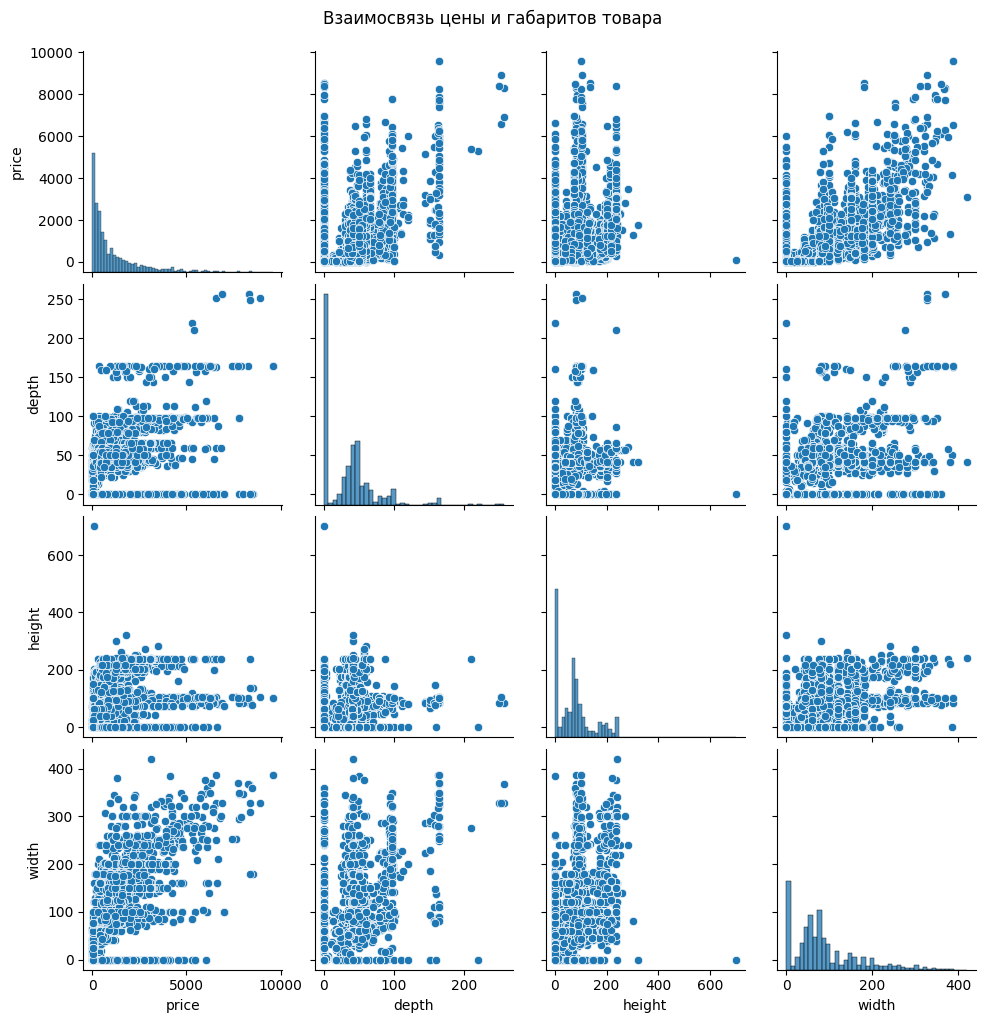

In [17]:
# ваш код
# есть ли пропущенные значения в габаритах
df[['depth', 'height', 'width']].isnull().sum()
# Заменим на 0
df[['depth', 'height', 'width']] = df[['depth', 'height', 'width']].fillna(0)

sns.pairplot(df[['price', 'depth', 'height', 'width']])
plt.suptitle('Взаимосвязь цены и габаритов товара', y=1.02)
plt.show()

### Гипотеза 2: Категория товара напрямую влияет на его цену. (Например, крупная мебель дороже, чем мелкие предметы интерьера).

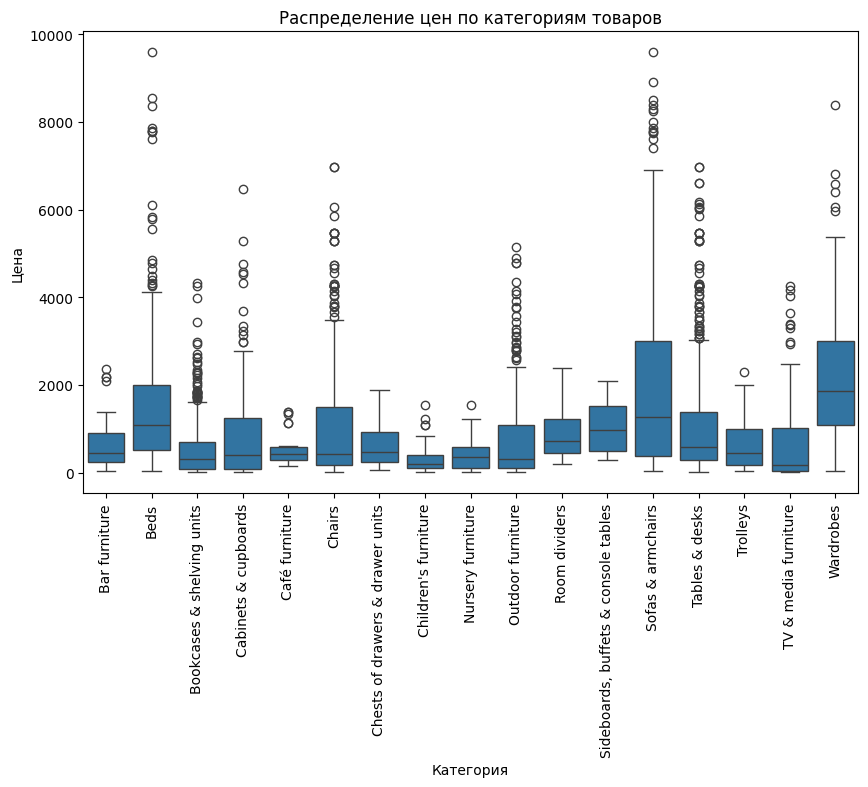

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Распределение цен по категориям товаров')
plt.xticks(rotation=90)
plt.ylabel('Цена')
plt.xlabel('Категория')
plt.show()

### Гипотеза 3: Товары, доступные для онлайн-продаж, имеют более компактные размеры.

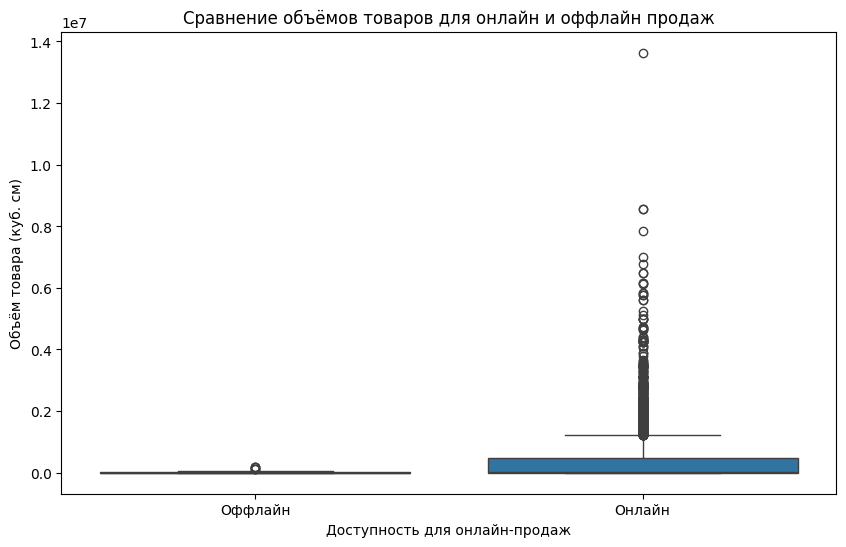

In [19]:
# Вычисляем объём товара на основе его размеров
df['volume'] = df['width'] * df['height'] * df['depth']
# Убираем строки с отсутствующими данными для объёма
df = df.dropna(subset=['volume'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='sellable_online', y='volume', data=df)
plt.title('Сравнение объёмов товаров для онлайн и оффлайн продаж')
plt.xlabel('Доступность для онлайн-продаж')
plt.ylabel('Объём товара (куб. см)')
plt.xticks([0, 1], ['Оффлайн', 'Онлайн'])
plt.show()

### Гипотеза 4: Товары, созданные дизайнерами IKEA of Sweden, имеют более низкую цену по сравнению с товарами других дизайнеров.

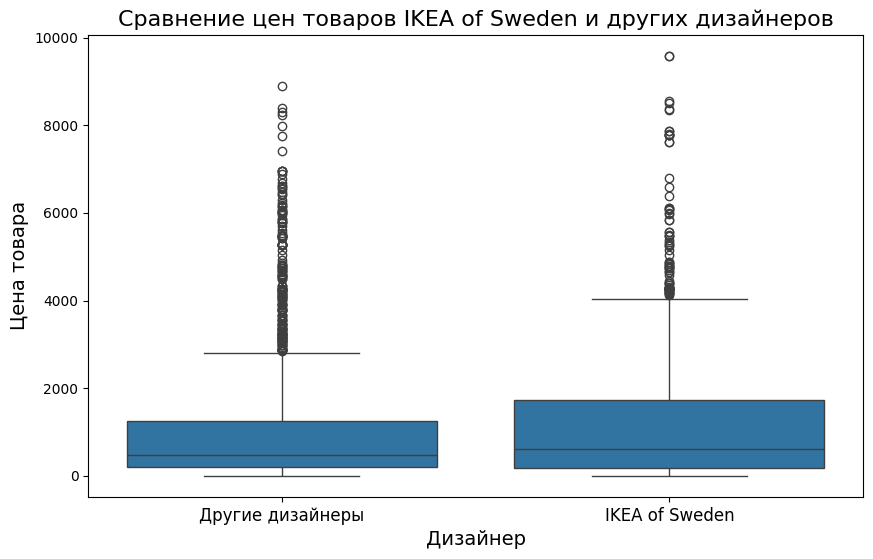

In [20]:
# Добавляем новый столбец, указывающий, создан ли товар дизайнерами IKEA of Sweden
df['is_IKEA_designer'] = df['designer'].apply(lambda x: 'IKEA of Sweden' in str(x))

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_IKEA_designer', y='price', data=df)
plt.title('Сравнение цен товаров IKEA of Sweden и других дизайнеров', fontsize=16)
plt.xlabel('Дизайнер', fontsize=14)
plt.ylabel('Цена товара', fontsize=14)
plt.xticks([0, 1], ['Другие дизайнеры', 'IKEA of Sweden'], fontsize=12)
plt.show()

# Выводы

Какие из ваших гипотез подтвердились? Попробуйте сделать краткие выводы о данных на основании анализа

Гипотеза 1: как видно на графике, явных зависимостей между габаритами и ценой нет, хотя некоторые товары с большими габаритами действительно могут стоить дороже.

Гипотеза не подтвердилась полностью.

Гипотеза 2: как видно на графике, цены на товары варьируются в зависимости от категории. например, кровати имеют более высокие медианные цены по сравнению с детской мебелью.

Гипотеза подтвердилась.

Гипотеза 3: как видно на графике, товары, доступные для онлайн-продаж, в среднем имеют гораздо большие объёмы, чем те, что доступны оффлайн. также максимальные объёмы онлайн-товаров значительно превышают максимальные объёмы оффлайн-товаров.

Гипотеза не подтвердилась.

Гипотеза 4: как видно на графике, товары, созданные IKEA of Sweden наоборт, в среднем имеют более высокую цену, чем товары других дизайнеров.

Гипотеза не подтвердилась.